# Gradient Boosting Classifier - Interactive Demo
This notebook demonstrates training, evaluation, and visualization of a Gradient Boosting Classifier built from scratch.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BoostingTrees.model.GradientBoostingClassifier import GradientBoostingClassifier
from sklearn.decomposition import PCA

## Load Dataset

In [2]:
# Change this to test different datasets
csv_path = "BoostingTrees/tests/small_test_class.csv"
print("Reading file:", csv_path)

df = pd.read_csv(csv_path)
target_col = df.columns[-1]
print("Detected target column:", target_col)

X = df.drop(columns=[target_col]).values
y = df[target_col].values.astype(int)

print("Shape:", X.shape)
print("Target distribution:", np.unique(y, return_counts=True))


Reading file: BoostingTrees/tests/small_test_class.csv
Detected target column: y
Shape: (10, 3)
Target distribution: (array([0, 1]), array([6, 4], dtype=int64))


## Train Gradient Boosting Model

In [3]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X, y)


## Evaluate Accuracy

In [4]:
preds = model.predict(X)
accuracy = (preds == y).mean()
print("Accuracy:", accuracy)


Accuracy: 1.0


## Visualization: Prediction vs True Labels (1st Feature)

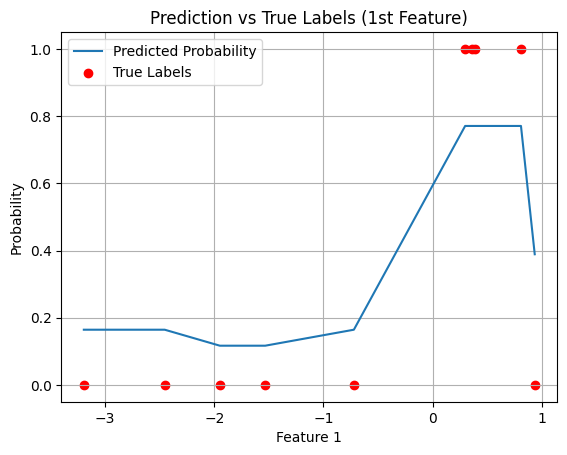

In [5]:
if X.shape[1] >= 1:
    x_sorted = np.argsort(X[:, 0])
    proba = model.predict_proba(X)
    plt.plot(X[x_sorted, 0], proba[x_sorted], label="Predicted Probability")
    plt.scatter(X[:, 0], y, color='red', label="True Labels")
    plt.xlabel("Feature 1")
    plt.ylabel("Probability")
    plt.legend()
    plt.title("Prediction vs True Labels (1st Feature)")
    plt.grid(True)
    plt.show()
else:
    print("Dataset does not have at least 1 feature to visualize.")


## Visualization: 2D PCA Projection (for higher dimensional features)

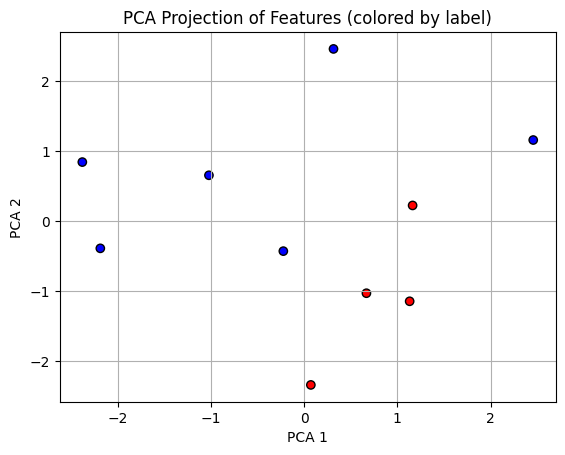

In [6]:
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap="bwr", edgecolor='k')
    plt.title("PCA Projection of Features (colored by label)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.show()
else:
    print("Dataset has 2 or fewer features — PCA projection not required.")
